# EDA

Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

### Task 1: Basic EDA

Loading the dataset and showing the summary

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

df.head(5)
df.info()

# Show summary for numerical columns
df.describe()

# Check for missing values
missing_values = df.isnull().sum()

# Show summary for numerical columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Impute 10 null values in TotalCharges with mean values. <br> 
Create the data distribution of the dataset and plot it.


Data Distribution:

customerID distribution:
customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64

gender distribution:
gender
Male      3555
Female    3488
Name: count, dtype: int64

SeniorCitizen distribution:
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

Partner distribution:
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Dependents distribution:
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

tenure distribution:
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

PhoneService distribution:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

MultipleLines distribution:
MultipleLines
No                  3390
Yes                 2971
No phone service     682

C:\Users\vyshn\AppData\Local\Temp\ipykernel_6852\639989066.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)


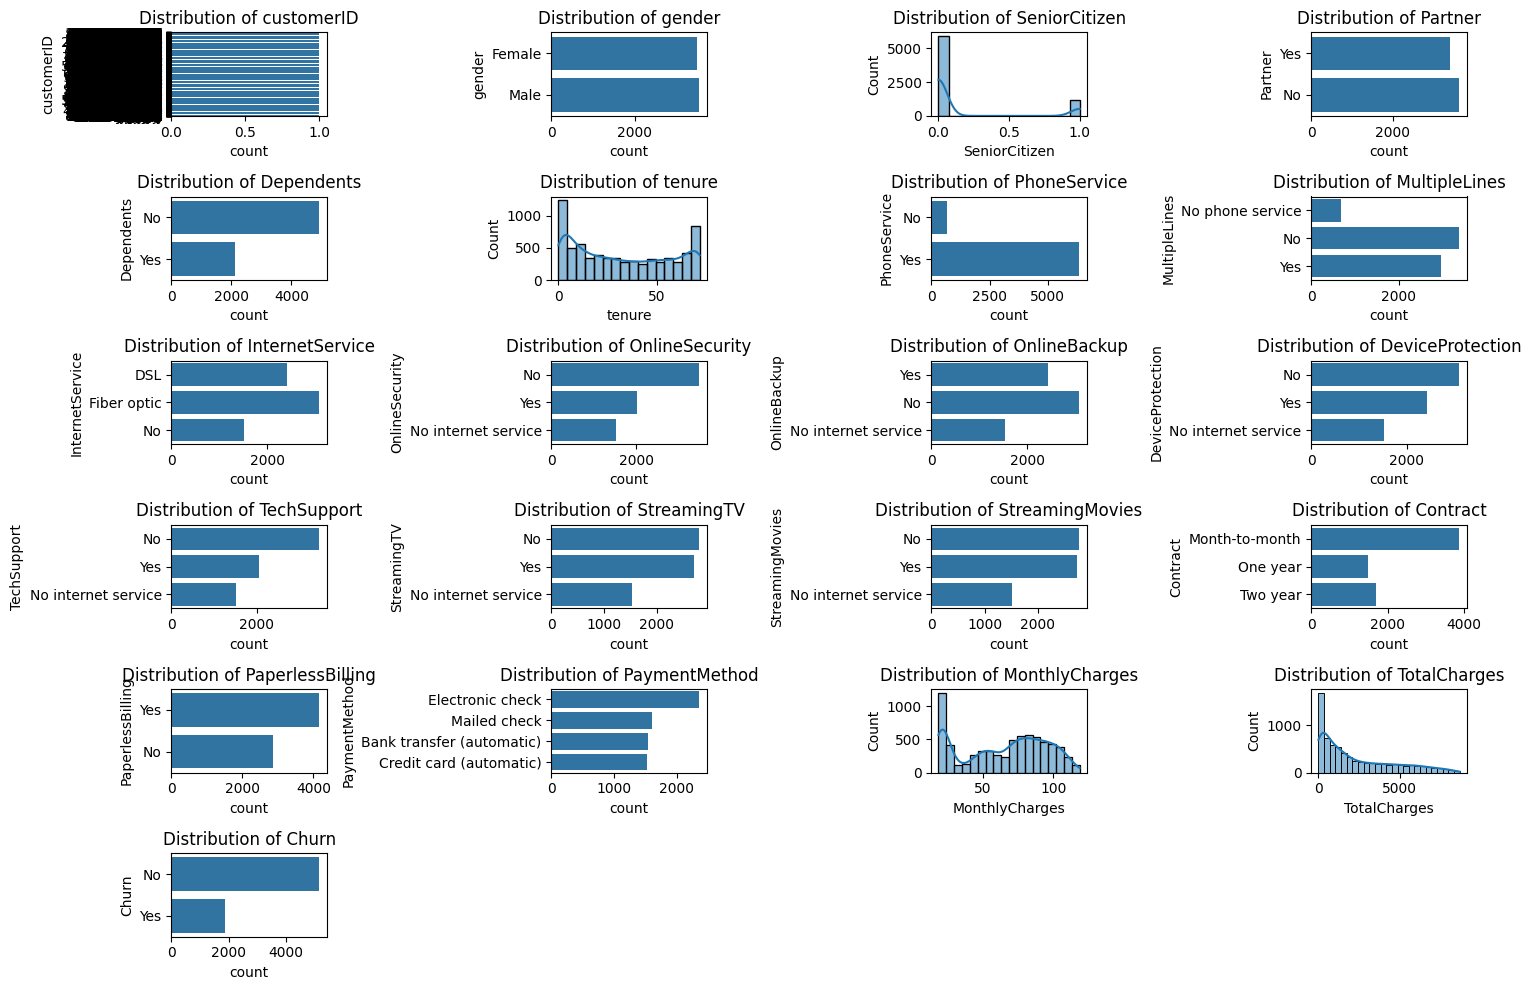

In [3]:
# Impute missing values with the mean of the column
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

# Data Distribution
print("\nData Distribution:")
for column in df.columns:
    print(f"\n{column} distribution:")
    print(df[column].value_counts())

# Plotting Distribution of Features
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(6, 4, i) 
    if df[column].dtype == 'object':
        sns.countplot(y=df[column])
        plt.title(f'Distribution of {column}')
    else:
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

Make the data easier for EDA via one-hot encoding. 

In [4]:
# Define the columns to be encoded
binary_columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

for col in binary_columns:
        df[col] = df[col].apply(lambda x: True if x == 'Yes' else False)

# List of columns with 'Yes', 'No', and 'No internet service' values
internet_related_columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Processing columns with 'No internet service'
for col in internet_related_columns:
    # Creating a new column to indicate 'No internet service'
    df[f'{col}_NoInternetService'] = df[col].apply(lambda x: 1 if x == 'No internet service' else 0)
    # Converting the original column to binary (1 for 'Yes', 0 for 'No')
    df[col] = df[col].apply(lambda x: 1 if x == 'Yes' else 0)

# Handling 'MultipleLines' with 'No phone service'
df['MultipleLines_NoPhoneService'] = df['MultipleLines'].apply(lambda x: 1 if x == 'No phone service' else 0)
df['MultipleLines_Yes'] = df['MultipleLines'].apply(lambda x: 1 if x == 'Yes' else 0)

# Dropping the original 'MultipleLines' column
df.drop(columns=['MultipleLines'], inplace=True)

# One-hot encoding for binary columns
df['gender'] = df['gender'].apply(lambda x: True if x == 'Male' else False)
df['SeniorCitizen'] = df['SeniorCitizen'].apply(lambda x: True if x == 1 else False)

# One-hot encoding for InternetService
df = pd.concat([df, pd.get_dummies(df['InternetService'], prefix='InternetService')], axis=1)
df.drop(columns=['InternetService', f'{'InternetService'}_No'], inplace=True)

# One-hot encoding for Contract
df = pd.concat([df, pd.get_dummies(df['Contract'], prefix='Contract')], axis=1)
df.drop(columns=['Contract'], inplace=True)

# One-hot encoding for PaymentMethod
df = pd.concat([df, pd.get_dummies(df['PaymentMethod'], prefix='PaymentMethod')], axis=1)
df.drop(columns=['PaymentMethod'], inplace=True)

# Identify boolean columns
bool_columns = df.select_dtypes(include='bool').columns

# Convert boolean columns to 1 and 0 to make it easier for EDA
df[bool_columns] = df[bool_columns].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 34 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   gender                                   7043 non-null   int32  
 2   SeniorCitizen                            7043 non-null   int32  
 3   Partner                                  7043 non-null   int32  
 4   Dependents                               7043 non-null   int32  
 5   tenure                                   7043 non-null   int64  
 6   PhoneService                             7043 non-null   int32  
 7   OnlineSecurity                           7043 non-null   int64  
 8   OnlineBackup                             7043 non-null   int64  
 9   DeviceProtection                         7043 non-null   int64  
 10  TechSupport                              7043 no

### Task 2: Analyze Popularity

Choose product-related columns and find the sum of customers using the service to find the most popular service.

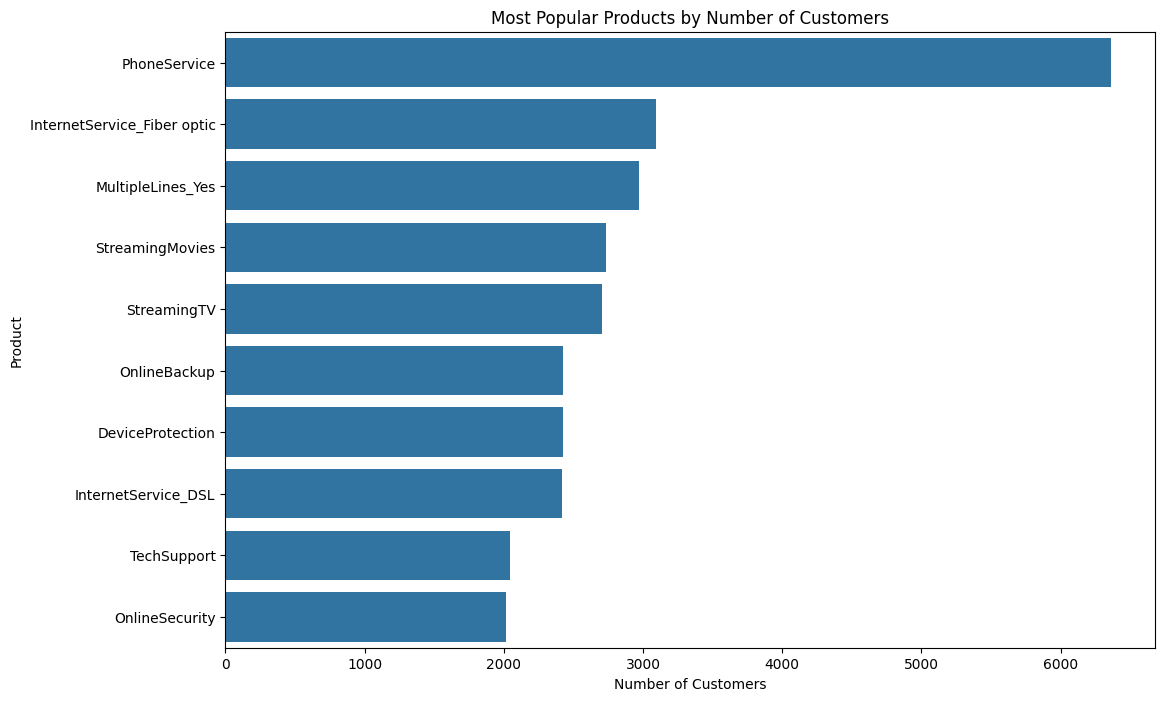

,Product,Number of Customers
0,PhoneService,6361
1,InternetService_Fiber optic,3096
2,MultipleLines_Yes,2971
3,StreamingMovies,2732
4,StreamingTV,2707
5,OnlineBackup,2429
6,DeviceProtection,2422
7,InternetService_DSL,2421
8,TechSupport,2044
9,OnlineSecurity,2019


In [5]:
# List of product-related columns to analyze popularity
product_columns = [
    'PhoneService', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
    'StreamingMovies'
]

# Calculating the number of customers who have each product/service
product_popularity = df[product_columns].sum().sort_values(ascending=False)

# Converting product popularity to a DataFrame for better visualization
product_popularity_df = pd.DataFrame(product_popularity, columns=['Number of Customers']).reset_index()
product_popularity_df.rename(columns={'index': 'Product'}, inplace=True)

# Plotting the product popularity
plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Customers', y='Product', data=product_popularity_df)
plt.title('Most Popular Products by Number of Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Product')
plt.show()

# Displaying the product popularity ranking table
product_popularity_df


### Task 3: Find seervices/plans bought together/separately

List out the different services. <br>
Compute pairwise combinations and calculate total customers for each pair to find probabilities. 

In [6]:
# List of product-related columns to analyze purchase together
product_columns = [
    'PhoneService', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
    'StreamingMovies', 'PaperlessBilling'
]

# Compute pairwise combinations of products purchased together
combination_counts = {}

# Generate all possible combinations of product columns
combinations = list(itertools.combinations(product_columns, 2))

# Calculate the number of customers for each combination
for combo in combinations:
    # Counting customers who purchased both products in a combination
    count_both = df[(df[combo[0]] == 1) & (df[combo[1]] == 1)].shape[0]
    
    # Counting customers who purchased only the first product in the combination
    count_first = df[df[combo[0]] == 1].shape[0]
    
    # Counting customers who purchased only the second product in the combination
    count_second = df[df[combo[1]] == 1].shape[0]
    
    # Calculating the probability of purchasing both products together
    prob_together = count_both / df.shape[0]
    
    # Calculating the probability of purchasing the first product given the second product is purchased
    prob_first_given_second = count_both / count_second if count_second != 0 else 0
    
    # Calculating the probability of purchasing the second product given the first product is purchased
    prob_second_given_first = count_both / count_first if count_first != 0 else 0
    
    # Storing results
    combination_counts[combo] = {
        'Count Both': count_both,
        'Probability Both are Bought Together': prob_together,
        'Probability Both are Bought Separately': 1 - prob_together,
        'Probability First Given Second': prob_first_given_second,
        'Probability Second Given First': prob_second_given_first
    }

# Converting results to a DataFrame for better visualization
combination_df = pd.DataFrame.from_dict(combination_counts, orient='index')

# Displaying the DataFrame
combination_df


Count Both  \
PhoneService                MultipleLines_Yes                  2971   
                            InternetService_DSL                1739   
                            InternetService_Fiber optic        3096   
                            OnlineSecurity                     1736   
                            OnlineBackup                       2142   
                            DeviceProtection                   2117   
                            TechSupport                        1755   
                            StreamingTV                        2422   
                            StreamingMovies                    2434   
                            PaperlessBilling                   3784   
MultipleLines_Yes           InternetService_DSL                 691   
                            InternetService_Fiber optic        1938   
                            OnlineSecurity                     1006   
                            OnlineBackup                       1359   
                            DeviceProtection                   1354   
                            TechSupport                        1021   
                            StreamingTV                        1577   
                            StreamingMovies                    1591   
                            PaperlessBilling                   2039   
InternetService_DSL         InternetService_Fiber optic           0   
                            OnlineSecurity                     1180   
                            OnlineBackup                       1086   
                            DeviceProtection                   1065   
                            TechSupport                        1178   
                            StreamingTV                         957   
                            StreamingMovies                     981   
                            PaperlessBilling                   1330   
InternetService_Fiber optic OnlineSecurity                      839   
                            OnlineBackup                       1343   
                            DeviceProtection                   1357   
                            TechSupport                         866   
                            StreamingTV                        1750   
                            StreamingMovies                    1751   
                            PaperlessBilling                   2395   
OnlineSecurity              OnlineBackup                       1126   
                            DeviceProtection                   1111   
                            TechSupport                        1099   
                            StreamingTV                        1049   
                            StreamingMovies                    1074   
                            PaperlessBilling                   1190   
OnlineBackup                DeviceProtection                   1318   
                            TechSupport                        1152   
                            StreamingTV                        1393   
                            StreamingMovies                    1390   
                            PaperlessBilling                   1647   
DeviceProtection            TechSupport                        1209   
                            StreamingTV                        1567   
                            StreamingMovies                    1595   
                            PaperlessBilling                   1605   
TechSupport                 StreamingTV                        1218   
                            StreamingMovies                    1228   
                            PaperlessBilling                   1270   
StreamingTV                 StreamingMovies                    1940   
                            PaperlessBilling                   1980   
StreamingMovies             PaperlessBilling                   1975   

                                                         Probability Both are Bo

### Task 4: Cluster customers based on observed data

Standardize the features.<br>
Find optimal number of KMeans Clusters required using Elbow Method.

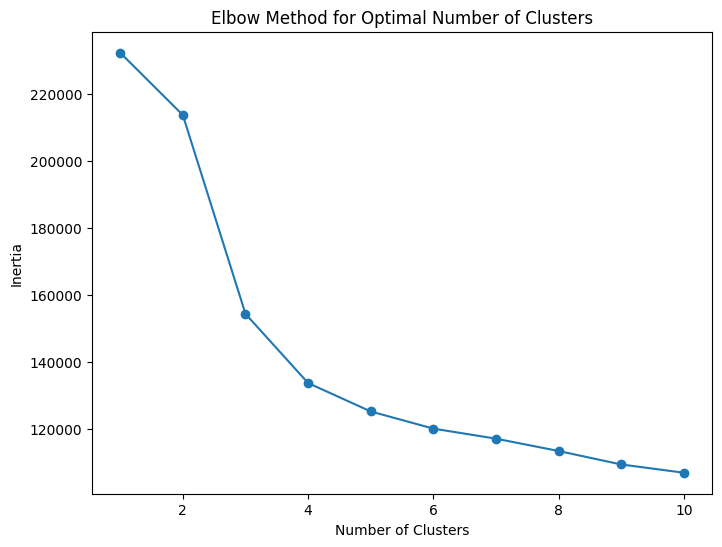

In [7]:
# Selecting relevant features for clustering (excluding non-numeric features)
features = df.drop(columns=['customerID'])

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
cluster_range = range(1, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method results
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

Using the optimal number of clusters 4(or we can use 3), use PCA for reducing dimensions and plot the clusters.

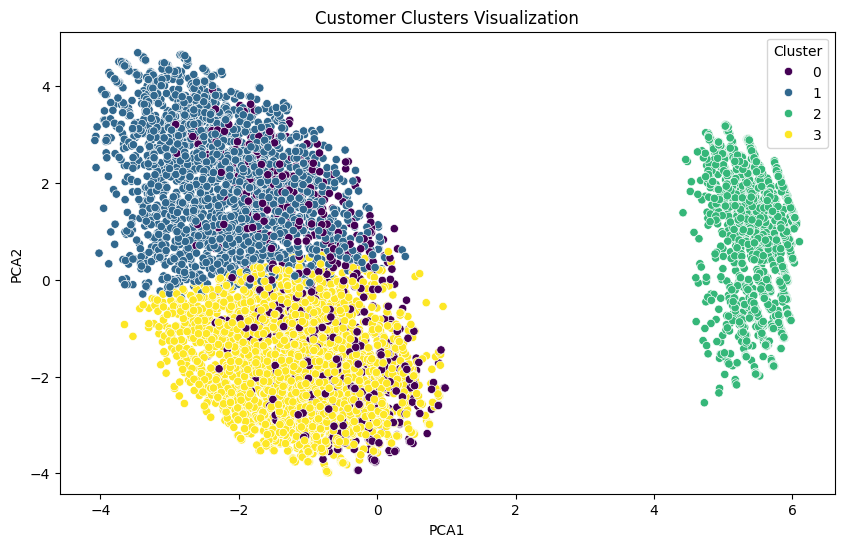

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Cluster,PCA1,PCA2
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,...,1,0,0,0,0,1,0,0,-0.369771,-2.391368
1,5575-GNVDE,1,0,0,0,34,1,1,0,1,...,0,1,0,0,0,0,1,1,-0.057679,0.304163
2,3668-QPYBK,1,0,0,0,2,1,1,1,0,...,1,0,0,0,0,0,1,3,-0.221798,-2.400307
3,7795-CFOCW,1,0,0,0,45,0,1,0,1,...,0,1,0,1,0,0,0,0,-0.833810,1.141211
4,9237-HQITU,0,0,0,0,2,1,0,0,0,...,1,0,0,0,0,1,0,3,-0.523897,-3.753724
5,9305-CDSKC,0,0,0,0,8,1,0,0,1,...,1,0,0,0,0,1,0,3,-2.257011,-2.520014
6,1452-KIOVK,1,0,0,1,22,1,0,1,0,...,1,0,0,0,1,0,0,3,-1.465660,-0.639845
7,6713-OKOMC,0,0,0,0,10,0,1,0,0,...,1,0,0,0,0,0,1,0,0.490106,-2.007958
8,7892-POOKP,0,0,1,0,28,1,0,0,1,...,1,0,0,0,0,1,0,3,-2.916166,-1.015485
9,6388-TABGU,1,0,0,1,62,1,1,1,0,...,0,1,0,1,0,0,0,1,-0.536416,1.712092


In [8]:
# Based on the Elbow plot, let's choose an optimal number of clusters
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Use PCA for visualization (reduce dimensions to 2D for plotting)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA results to the dataframe for visualization
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')
plt.title('Customer Clusters Visualization')
plt.show()

# Display the clustered data
df.head(10)

### Task 5: Segment customers based on their purchasing preferences

Select the relevant features that indicate purchasing preferences.<br>
Standardize the features.<br>
Use KMeans Clustering and analyze the cluster to get the segment data. <br>
Visualize the segments.

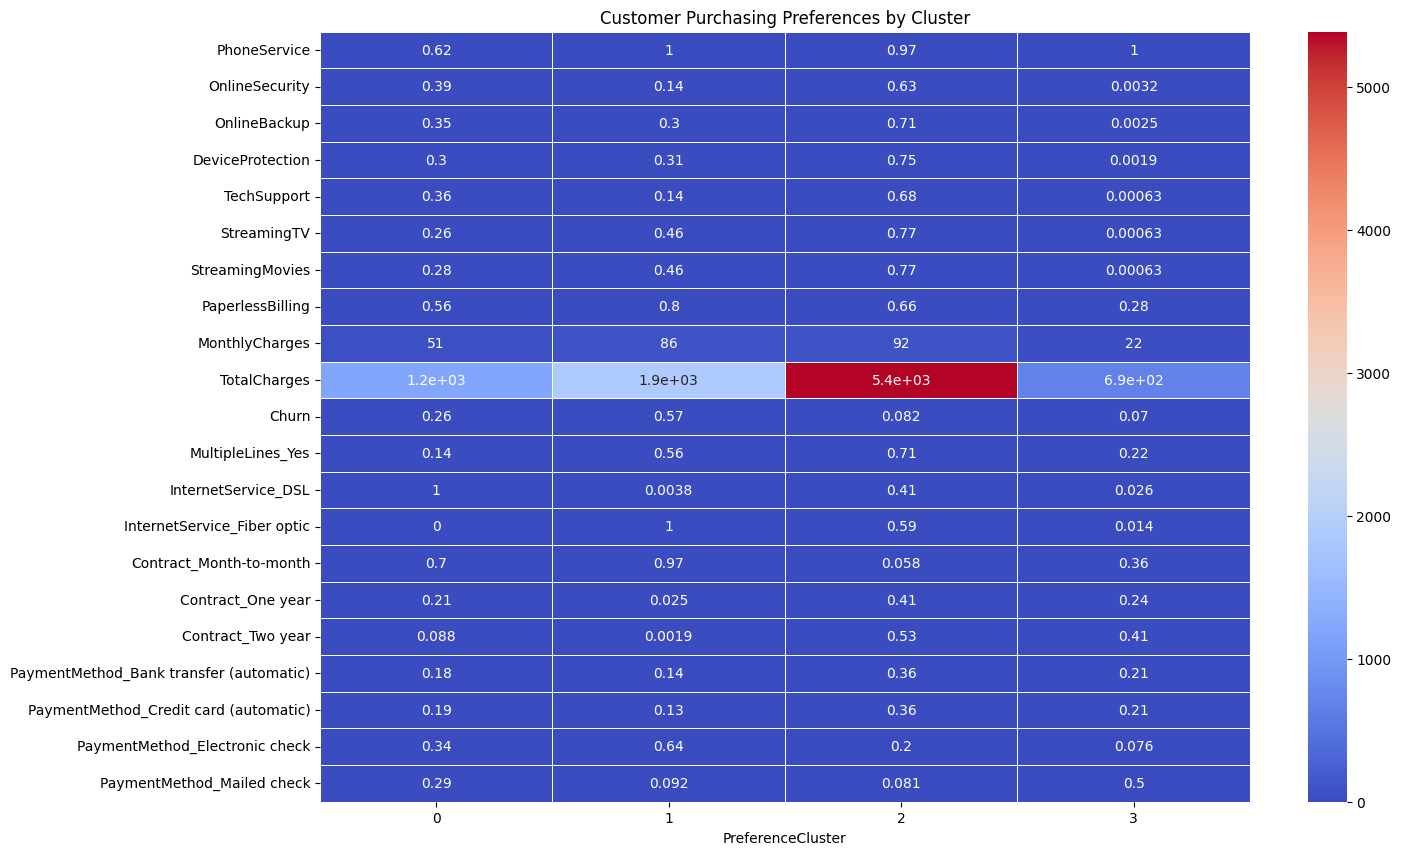

,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,...,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
PreferenceCluster,,,,,,,,,,,,,,,,,,,,,
0,0.624851,0.392473,0.354839,0.299881,0.362007,0.264636,0.275388,0.564516,50.638799,1189.554152,...,0.144564,1.000000,0.000000,0.698925,0.213262,0.087814,0.182796,0.187575,0.335125,0.294504
1,1.000000,0.142993,0.304099,0.309342,0.138227,0.462345,0.461392,0.796473,86.331411,1872.433174,...,0.562917,0.003813,0.995234,0.972831,0.025262,0.001907,0.140133,0.126311,0.642040,0.091516
2,0.967933,0.627672,0.708432,0.752969,0.681116,0.767815,0.773159,0.656176,91.796556,5385.336521,...,0.710214,0.414489,0.585511,0.058195,0.407957,0.533848,0.358076,0.360451,0.200119,0.081354
3,1.000000,0.003151,0.002520,0.001890,0.000630,0.000630,0.000630,0.283554,22.456553,688.531728,...,0.221802,0.025835,0.013863,0.356648,0.236925,0.406427,0.214871,0.211720,0.075614,0.497795


In [9]:
# Selecting relevant features for clustering based on purchasing preferences
purchasing_preferences_columns = [
    'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
    'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
    'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 
    'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
    'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)',
    'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'
]

# Extracting features for segmentation
X = df[purchasing_preferences_columns]

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Using KMeans for clustering
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['PreferenceCluster'] = kmeans.fit_predict(X_scaled)

# Analyzing clusters
cluster_summary = df.groupby('PreferenceCluster')[purchasing_preferences_columns].mean()

# Visualize cluster characteristics
plt.figure(figsize=(15, 10))
sns.heatmap(cluster_summary.T, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Customer Purchasing Preferences by Cluster')
plt.show()

# Display cluster summary
cluster_summary

### Save the final data frame to a separate CSV file for later uses.

In [10]:
output_file_path = 'For_Model.csv'
df.to_csv(output_file_path, index=False)

# Machine Learning

### Task 6: Basic Machine Learning for prediction

Import necessary libraries.

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

Separate the data into training and testing. <br>
Use a Random Forest Model for prediction.<br>
Train the model and predict on the test set.<br>
Use evaluation metrics like accuracy, AUROC and F1 scores to see how well the model did.<br>
Plot a confusion matrix. 

Accuracy: 0.9084
AUROC: 0.9565
F1 Score: 0.8077


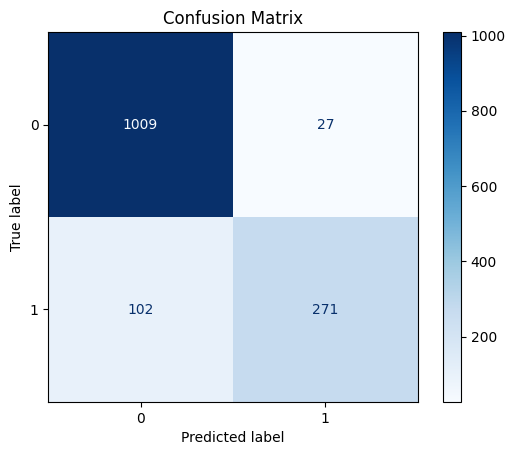

In [12]:
df = pd.read_csv('For_Model.csv')

# Prepare the data
X = df.drop(columns=['customerID', 'Churn'])  # Features
y = df['Churn']  # Target variable

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForest model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
auroc = roc_auc_score(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'AUROC: {auroc:.4f}')
print(f'F1 Score: {f1:.4f}')

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

### Task 7: Use a Transformer for Tabular Data to predict Churn.

Use Pytorch's TabNet. <br>
Convert DF into required format of Numpy.<br>
Initialize and train TabNet model, then make predictions.<br>
Evaluate prediction on Accuracy, AUROC and F1 Scores.<br>
Plot Confusion Matrix.

Import necessary libraries.

In [13]:
%pip install pytorch_tabnet

from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix

Conduct label encoding.<br>
Initialize and train TabNet for 100 epochs, then predict.<br>
Evaluate and plot confusion matrix.

c:\Python312\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
c:\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


epoch 0  | loss: 0.6306  | val_0_auc: 0.50296 |  0:00:00s
epoch 1  | loss: 0.5328  | val_0_auc: 0.70923 |  0:00:00s
epoch 2  | loss: 0.49656 | val_0_auc: 0.69573 |  0:00:00s
epoch 3  | loss: 0.47729 | val_0_auc: 0.73106 |  0:00:01s
epoch 4  | loss: 0.46484 | val_0_auc: 0.75142 |  0:00:01s
epoch 5  | loss: 0.45809 | val_0_auc: 0.75575 |  0:00:01s
epoch 6  | loss: 0.45076 | val_0_auc: 0.77789 |  0:00:02s
epoch 7  | loss: 0.44423 | val_0_auc: 0.77005 |  0:00:02s
epoch 8  | loss: 0.44324 | val_0_auc: 0.7921  |  0:00:02s
epoch 9  | loss: 0.44304 | val_0_auc: 0.8125  |  0:00:03s
epoch 10 | loss: 0.43412 | val_0_auc: 0.81775 |  0:00:03s
epoch 11 | loss: 0.42925 | val_0_auc: 0.82523 |  0:00:03s
epoch 12 | loss: 0.41943 | val_0_auc: 0.82976 |  0:00:03s
epoch 13 | loss: 0.41654 | val_0_auc: 0.83523 |  0:00:04s
epoch 14 | loss: 0.41131 | val_0_auc: 0.8372  |  0:00:04s
epoch 15 | loss: 0.4063  | val_0_auc: 0.8457  |  0:00:04s
epoch 16 | loss: 0.40401 | val_0_auc: 0.8452  |  0:00:05s
epoch 17 | los

c:\Python312\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Accuracy: 0.9979
AUROC: 1.0000
F1 Score: 0.9960


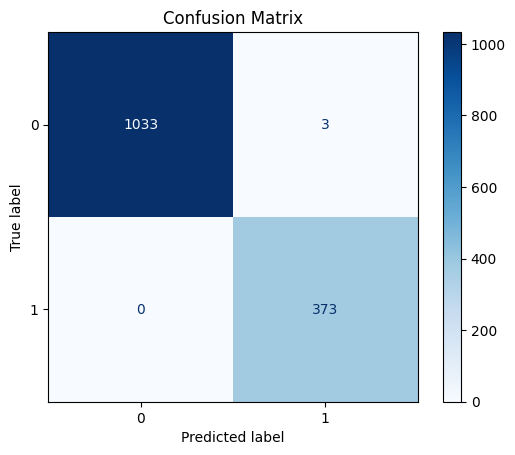

In [14]:
# Label encode the target variable if necessary
y_train_encoded = LabelEncoder().fit_transform(y_train)
y_test_encoded = LabelEncoder().fit_transform(y_test)

# Convert the data to the format required by TabNet
X_train_np, y_train_np = X_train.to_numpy(), y_train_encoded
X_test_np, y_test_np = X_test.to_numpy(), y_test_encoded

# Initialize and train TabNet model
tabnet_model = TabNetClassifier()
tabnet_model.fit(X_train_np, y_train_np, eval_set=[(X_test_np, y_test_np)], max_epochs=100, patience=20)

# Make predictions and evaluate
y_pred_proba = tabnet_model.predict_proba(X_test_np)[:, 1]
y_pred = (y_pred_proba > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test_np, y_pred)
auroc = roc_auc_score(y_test_np, y_pred_proba)
f1 = f1_score(y_test_np, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'AUROC: {auroc:.4f}')
print(f'F1 Score: {f1:.4f}')

# Confusion Matrix
cm = confusion_matrix(y_test_np, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

### Task 8: Create a Recommendation System based on Apriori Algorithm.

Import necessary libraries.

In [15]:
%pip install mlxtend

import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import random

Remove irrelevant features for setting the rules for creating the recommendation system. <br>
Convert binary features from 1s and 0s to Boolean values since I kept getting an annoying warning.

In [16]:
# Prepare the data by converting features to binary
X_apriori = X_train.copy()

# Convert numerical features to binary based on a threshold
X_apriori['tenure'] = (X_apriori['tenure'] > 24).astype(bool)  # Convert to boolean

# Define columns to exclude from Apriori
columns_to_exclude = [col for col in X_apriori.columns if '_NoInternetService' in col or '_NoPhoneService' in col or col in ['MonthlyCharges', 'TotalCharges', 'Cluster', 'PCA1', 'PCA2', 'gender', 'Partner', 'SeniorCitizen', 'Dependents', 'tenure', 'PaperlessBilling']]

# Remove irrelevant columns
X_apriori.drop(columns=columns_to_exclude, inplace=True)

# Use only relevant binary features for Apriori
binary_columns = [col for col in X_apriori.columns if X_apriori[col].nunique() == 2]

# Convert the binary columns to boolean type for Apriori
X_apriori = X_apriori[binary_columns].astype(bool)

# Applying the apriori algorithm with min_support to capture diverse rules
frequent_itemsets = apriori(X_apriori, min_support=0.01, use_colnames=True)  

# Deriving the association rules with a min_threshold
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)

# Filter rules to include only actionable services/plans for both antecedents and consequents
actionable_services = [
    'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'InternetService_DSL', 'InternetService_Fiber optic',
    'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'MultipleLines_Yes'
]

rules = rules[
    rules['consequents'].apply(lambda x: all(item in actionable_services for item in x)) &
    rules['antecedents'].apply(lambda x: all(item in actionable_services for item in x))
]

# Sort rules by confidence in descending order
rules = rules.sort_values(by='confidence', ascending=False)

# Function to recommend based on rules (limit to top 10 recommendations based on confidence)
def recommend_plans(features, rules, max_recommendations=10):
    recommended_plans = []
    seen_consequents = set()  # Keep track of unique consequents to avoid repetition
    for _, rule in rules.iterrows():
        # Check if all antecedents are in the customer's features and the antecedents are not empty
        if all(features.get(feature, False) for feature in rule['antecedents']) and len(rule['antecedents']) > 0:
            if not rule['consequents'].issubset(seen_consequents):  # Check for unique consequents
                recommended_plans.append(rule['consequents'])
                seen_consequents.update(rule['consequents'])  # Add to seen set
        if len(recommended_plans) >= max_recommendations:  # Limit the number of recommendations
            break
    return recommended_plans

# Generate recommendations for 10 random customers from X_test
random_indices = random.sample(list(X_test.index), 10)

for idx in random_indices:
    new_customer_features = X_test.loc[idx].copy()  # Required since we cannot edit the subset of X_test directly
    new_customer_features['tenure'] = float((new_customer_features['tenure'] > 24).astype(int))     # Required to avoid an annoying warning
    new_customer_features.drop(columns=columns_to_exclude, inplace=True)

    # Convert to boolean type for the recommendation function
    new_customer_features_binary = (new_customer_features > 0).astype(bool)  # Convert to boolean

    # Get recommended plans
    recommended_plans = recommend_plans(new_customer_features_binary, rules)

    # Convert frozenset to list for better readability
    formatted_recommendations = [list(plan) for plan in recommended_plans]
    print(f"Customer {idx}: Recommended plans: {formatted_recommendations}\n")


Customer 4666: Recommended plans: [['PhoneService'], ['InternetService_Fiber optic'], ['Contract_Month-to-month'], ['MultipleLines_Yes'], ['StreamingMovies'], ['StreamingTV'], ['OnlineBackup'], ['DeviceProtection'], ['InternetService_DSL'], ['TechSupport']]

Customer 2473: Recommended plans: [['PhoneService'], ['InternetService_Fiber optic'], ['Contract_Month-to-month'], ['MultipleLines_Yes'], ['StreamingMovies'], ['StreamingTV'], ['OnlineBackup'], ['DeviceProtection'], ['InternetService_DSL'], ['TechSupport']]

Customer 6657: Recommended plans: [['PhoneService'], ['Contract_Month-to-month'], ['InternetService_Fiber optic'], ['MultipleLines_Yes'], ['StreamingMovies'], ['StreamingTV'], ['DeviceProtection'], ['OnlineBackup'], ['InternetService_DSL'], ['TechSupport']]

Customer 543: Recommended plans: [['PhoneService'], ['InternetService_Fiber optic'], ['StreamingMovies'], ['MultipleLines_Yes'], ['Contract_Month-to-month'], ['StreamingTV'], ['DeviceProtection'], ['OnlineBackup'], ['TechSu